In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_excel("HPLC/SEP15ATL_HPLCNuts.xlsx")
feature_list = ['latitude','longitude','depth', 'temperature', 'salinity','NO3']
data['code']=data['Station '].str[:3]
data.iloc[:,40:95] = data.iloc[:,40:95].applymap(lambda x: 0 if x < 0 else x)
data.iloc[:,23:27] = data.iloc[:,23:27].applymap(lambda x: 0 if x < 0 else x)
data['depth'] = pd.to_numeric(data.depth,errors='coerce')
data.dropna(subset=feature_list,axis=0,inplace=True)
data.dropna(subset='[Allo]',axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 2 to 216
Data columns (total 96 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Station           89 non-null     object        
 1   Date              89 non-null     datetime64[ns]
 2   Cruise Name       89 non-null     object        
 3   Year              89 non-null     int64         
 4   Month             89 non-null     int64         
 5   Day               89 non-null     int64         
 6   Julian day        89 non-null     int64         
 7   Hour              89 non-null     int64         
 8   Minute            89 non-null     int64         
 9   Second            89 non-null     int64         
 10  Time(GMT)         89 non-null     object        
 11  Time Text         89 non-null     int64         
 12  LatDeg            89 non-null     float64       
 13  LatMin            89 non-null     float64       
 14  LongDeg           89 non-nu

/home/anhph/anaconda3/envs/argo_pft/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [23]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# for i in np.unique(data.code):
#     try:
#         #subdata = data.loc[data.code == i].select_dtypes(include=numerics)
#         subdata = data.loc[data.code == i].iloc[:,40:95]
#         temp = subdata.index
#         subdata.set_index(data.loc[data.code == i].depth,inplace=True)
#         subdata.interpolate(method='index',inplace=True)
#         subdata.set_index(temp,inplace=True)
#     except:
#         pass
#     data.update(subdata)

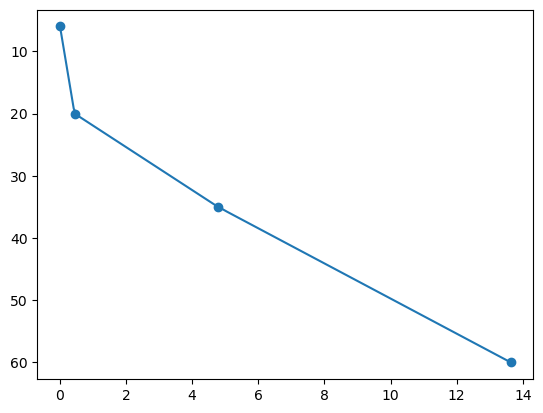

In [13]:
subdata = data.loc[data.code == np.unique(data.code)[0]]
plt.scatter(subdata.NO3,subdata.depth)
plt.gca().invert_yaxis()
from scipy.interpolate import InterpolatedUnivariateSpline
# positions to inter/extrapolate
x = np.linspace(np.nanmin(subdata.depth), np.nanmax(subdata.depth), 50)
# spline order: 1 linear, 2 quadratic, 3 cubic ... 
order = 1
# do inter/extrapolation
#s = InterpolatedUnivariateSpline(subdata.depth.iloc[::-1], subdata.NO3.iloc[::-1], k=order)
s = InterpolatedUnivariateSpline(subdata.depth, subdata.NO3, k=order)
y = s(x)
plt.plot(y,x)

In [55]:
subdata = data.loc[data.code == np.unique(data.code)[3]].sort_values(by='depth')
from scipy.interpolate import InterpolatedUnivariateSpline

# positions to inter/extrapolate
#x = np.linspace(np.nanmin(subdata.depth), np.nanmax(subdata.depth), 50)
x = np.linspace(0, np.nanmax(subdata.depth), 50)
# spline order: 1 linear, 2 quadratic, 3 cubic ... 
order = 1
predictor = subdata[feature_list].drop(labels='depth',axis=1)
# do inter/extrapolation
#s = InterpolatedUnivariateSpline(subdata.depth.iloc[::-1], subdata.NO3.iloc[::-1], k=order)
df = predictor.apply(lambda y: InterpolatedUnivariateSpline(subdata.depth, y, k=order)(x))

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the data on each subplot
axs[0,0].scatter(subdata[feature_list[3]],subdata.depth)
axs[0,0].plot(df[feature_list[3]],x)
axs[0,0].set_title(feature_list[3])
axs[0,1].scatter(subdata[feature_list[4]],subdata.depth)
axs[0,1].plot(df[feature_list[4]],x)
axs[0,1].set_title(feature_list[4])
axs[1,0].scatter(subdata[feature_list[5]],subdata.depth)
axs[1,0].plot(df[feature_list[5]],x)
axs[1,0].set_title(feature_list[5])
axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
# Add a title to the entire figure
#fig.suptitle(pft_list[i])

# Adjust the layout of the subplots
plt.tight_layout()

error: (m>k) failed for hidden m: fpcurf0:m=1

In [56]:
subdata = data.loc[data.code == np.unique(data.code)[3]].sort_values(by='depth')

In [1]:
hbt(subdata)

NameError: name 'hbt' is not defined

In [331]:
from sklearn.model_selection import train_test_split
#data.dropna(subset=feature_list,axis=0,inplace=True)
#feature_list = ['Latitude','Longitude','depth', 'temperature', 'salinity','Fluorometer']
pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]','[DV_Chl_a]', '[DV_Chl_b]']
feature_list =feature_list = ['Year','Month','latitude','longitude','depth', 'temperature', 'salinity','PO4', 'Silicate','NO3']

predictor = data[feature_list]
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2, weights="uniform")
# predictor = imputer.fit_transform(predictor)
predictor = (predictor-np.nanmean(predictor,axis=0))/np.nanstd(predictor,axis=0)
y = data[pft_list]
trainX, testX, trainY, testY = train_test_split(predictor,y,test_size=0.2)

In [332]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(random_state=0)
RFreg.fit(trainX, trainY)
RFreg.score(testX, testY)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

[But fuco]     0.014636
[Hex fuco]     0.047353
[Allo]         0.001862
[Fuco]         0.018920
[Perid]        0.004086
[Zea]          0.019325
[MV_Chl_a]     0.055864
[DV_Chl_a]     0.029692
[MV_Chl _b]    0.021599
[DV_Chl_b]     0.032248
dtype: float64


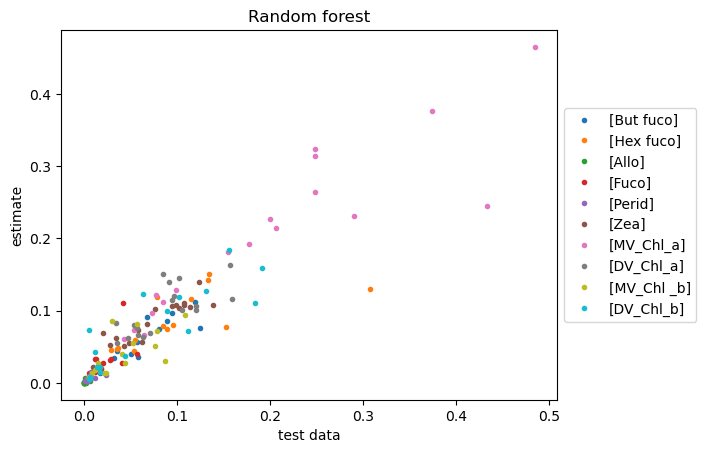

In [7]:
est = RFreg.predict(testX)
plt.plot(testY,est,'.',label=pft_list)
RMSE=np.sqrt(np.mean((testY-est)**2,axis=0))
print(RMSE)
plt.xlabel('test data')
plt.ylabel('estimate')
plt.title('Random forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Variable: Fluorometer          Importance: 0.55
Variable: depth                Importance: 0.1
Variable: temperature          Importance: 0.07
Variable: Latitude             Importance: 0.06
Variable: Julian day           Importance: 0.05
Variable: salinity             Importance: 0.03
Variable: PO4                  Importance: 0.03
Variable: Si                   Importance: 0.03
Variable: NO3+NO2              Importance: 0.03
Variable: NO3                  Importance: 0.03
Variable: Longitude            Importance: 0.02
Variable: NO2                  Importance: 0.01


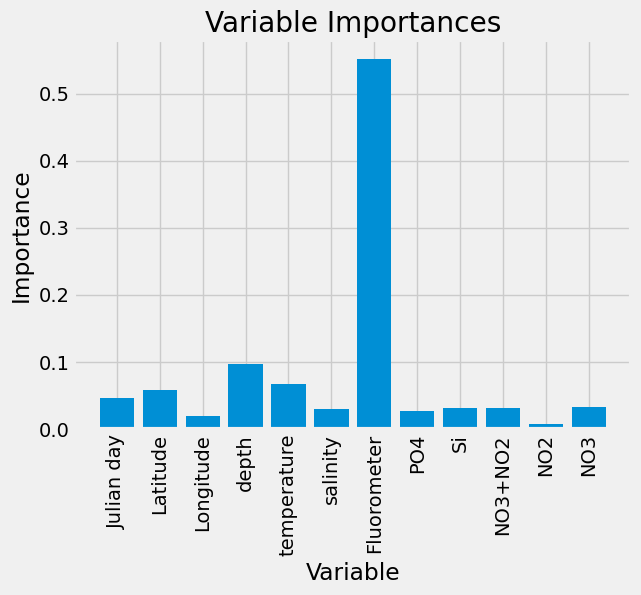

In [8]:
importances = list(RFreg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [9]:
# LOU Cross validation 
from sklearn.model_selection import cross_val_score,  LeaveOneOut
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.dummy import DummyRegressor
import multiprocessing
num_cores = multiprocessing.cpu_count()-1
model = RandomForestRegressor()
nullmodel = DummyRegressor()
model2 = HistGradientBoostingRegressor()
#cv = LeaveOneOut()
cv = 10
score = np.mean(abs(cross_val_score(model, predictor, y, cv=cv,scoring='neg_mean_squared_error',n_jobs=num_cores)))
nullscore = np.mean(abs(cross_val_score(nullmodel, predictor, y, cv=cv,scoring='neg_mean_squared_error',n_jobs=num_cores)))
#score2 = np.mean(abs(cross_val_score(model2, predictor, y, cv=cv,scoring='neg_mean_squared_error',n_jobs=num_cores)))
print(score, nullscore)

0.0011475436246249997 0.00393409051708081


/home/anhph/anaconda3/envs/argo_pft/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


0.0016122220495843483


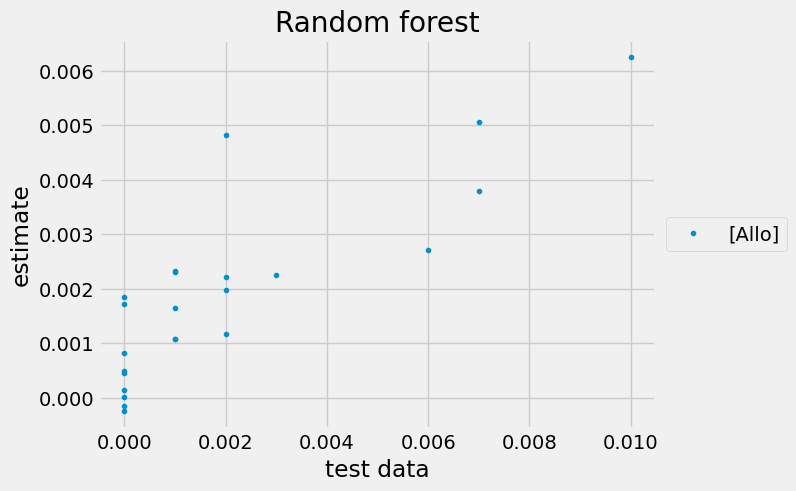

In [161]:
data = pd.read_excel("HPLC/SEP15ATL_HPLCNuts.xlsx")
#data.dropna(axis=0,subset=['[Microplankton]'], inplace = True)
data['code']=data['Station '].str[:3]
# table = data.isna().sum()
# print([i for i in table])
#data = data.applymap(lambda x: 0 if x < 0 else x)
data.iloc[:,40:95] = data.iloc[:,40:95].applymap(lambda x: 0 if x < 0 else x)
data.iloc[:,23:27] = data.iloc[:,23:27].applymap(lambda x: 0 if x < 0 else x)
data['depth'] = pd.to_numeric(data.depth,errors='coerce')
data.dropna(subset=['[Tot_Chl_a]','temperature','salinity'],inplace=True)
pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]','[DV_Chl_a]', '[DV_Chl_b]']
feature_list =feature_list = ['Year','Month','latitude','longitude','depth', 'temperature', 'salinity','PO4', 'Silicate','NO3']


predictor = data[feature_list]
predictor = (predictor-np.mean(predictor,axis=0))/np.std(predictor,axis=0)
i=2
y = data[pft_list[i]]
trainX, testX, trainY, testY = train_test_split(predictor,y,test_size=0.2)
from sklearn.ensemble import HistGradientBoostingRegressor
HGBreg = HistGradientBoostingRegressor()
HGBreg.fit(trainX, trainY)
HGBreg.score(testX, testY)
est = HGBreg.predict(testX)
plt.plot(testY,est,'.',label=pft_list[i])
RMSE=np.sqrt(np.mean((testY-est)**2,axis=0))
print(RMSE)
plt.xlabel('test data')
plt.ylabel('estimate')
plt.title('Random forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [11]:
data = pd.read_excel("HPLC/SEP15ATL_HPLCNuts.xlsx")
data['depth'] = pd.to_numeric(data.depth,errors='coerce')
pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]','[DV_Chl_a]', '[DV_Chl_b]']
feature_list =feature_list = ['latitude','longitude','depth', 'temperature', 'salinity','PO4', 'Silicate','NO3']
data.dropna(subset=feature_list,axis=0,inplace=True)
data.dropna(subset='[Allo]',axis=0,inplace=True)
predictor = data[feature_list]
from sklearn.model_selection import train_test_split

data.dropna(subset=feature_list,axis=0,inplace=True)
predictor = data[feature_list]
predictor = (predictor-np.mean(predictor,axis=0))/np.std(predictor,axis=0)
y = data[pft_list]
trainX, testX, trainY, testY = train_test_split(predictor,y,test_size=0.2)
RFreg = RandomForestRegressor(random_state=0)
RFreg.fit(trainX, trainY)
importances = list(RFreg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#=================
from sklearn.neural_network import MLPRegressor
NNreg = MLPRegressor(hidden_layer_sizes=(20,20,20),random_state=1, max_iter=1000)
NNreg.fit(trainX, trainY)

/home/anhph/anaconda3/envs/argo_pft/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

/home/anhph/anaconda3/envs/argo_pft/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


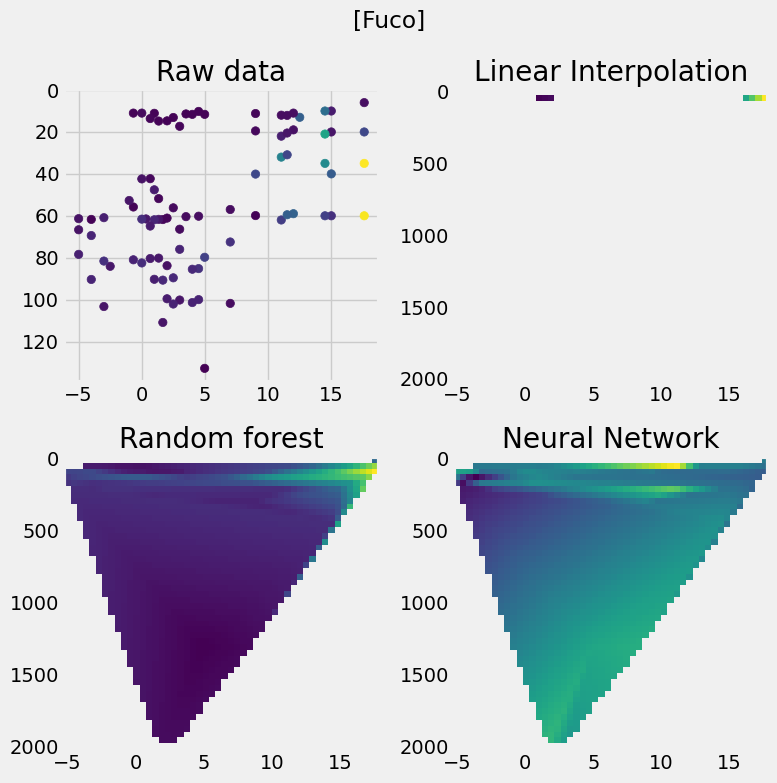

In [334]:
test = pd.read_excel("HPLC/SEP15ATL_HPLCNuts.xlsx")
test['depth'] = pd.to_numeric(test.depth,errors='coerce')
#feature_list = ['Latitude','Longitude','depth', 'temperature', 'salinity','Fluorometer']
test.dropna(subset=feature_list,axis=0,inplace=True)
predictor = test[feature_list]
predictor = (predictor-np.mean(predictor,axis=0))/np.std(predictor,axis=0)
rf = RFreg.predict(predictor)
nn = NNreg.predict(predictor)
# Change for parameters
#pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]', '[MV_Chl_a]','[DV_Chl_a]', '[MV_Chl _b]', '[DV_Chl_b]']
i = 3
# plt.scatter(test.Latitude,test.depth,c=est[:,0])
# plt.ylim(300,0)
xline = np.linspace(np.nanmin(test.latitude), np.nanmax(test.latitude),50)
yline = np.linspace(np.nanmin(test.depth), np.nanmax(test.depth),50)
xgrid, ygrid = np.meshgrid(xline, yline)
# Data interpolate
z_grid = griddata((test.latitude, test.depth), test[pft_list[i]], (xgrid, ygrid), method='linear')
# RF interpolate
z_grid_rf = griddata((test.latitude, test.depth), rf[:,i], (xgrid, ygrid), method='linear')
# NN interpolate
z_grid_nn = griddata((test.latitude, test.depth), nn[:,i], (xgrid, ygrid), method='linear')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the data on each subplot
axs[0,0].scatter(test.latitude,test.depth,c=test[pft_list[i]])
axs[0,0].set_title('Raw data')
axs[0,1].pcolormesh(xgrid, ygrid, z_grid)
axs[0,1].set_title('Linear Interpolation')
axs[1,0].pcolormesh(xgrid, ygrid, z_grid_rf)
axs[1,0].set_title('Random forest')
axs[1,1].pcolormesh(xgrid, ygrid, z_grid_nn)

axs[1,1].set_title('Neural Network')
axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()
# Add a title to the entire figure
fig.suptitle(pft_list[i])

# Adjust the layout of the subplots
plt.tight_layout()

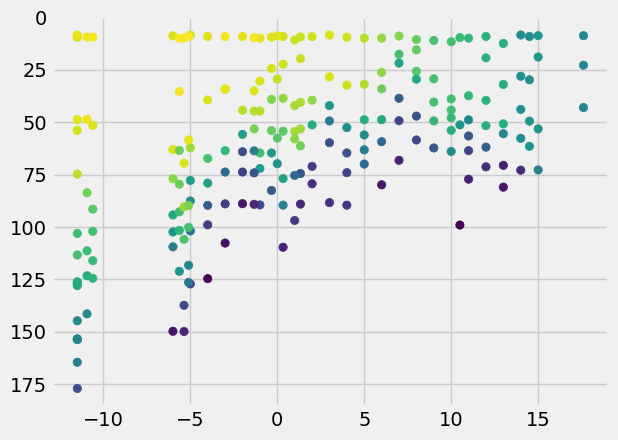

In [335]:
test = pd.read_excel("HPLC/FEB18ATLstationlogHPLC20210806.xlsx",'FiltLog')
plt.scatter(test.Latitude,test.depth,c=test['temperature'])
plt.gca().invert_yaxis()

In [12]:
data1 = pd.read_excel('HPLC/JUN09_merged.xlsx')
data2 = pd.read_excel('HPLC/M130_merged.xlsx')
data3 = pd.read_excel('HPLC/M145_merged.xlsx')
data4 = pd.read_excel('HPLC/M158_merged.xlsx')
data5 = pd.read_excel('HPLC/SEP15ATL_HPLCNuts.xlsx')
data3['Date'] = pd.to_datetime(data3['Date'])
data4['Date'] = pd.to_datetime(data4['Date'])
pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]','[DV_Chl_a]', '[DV_Chl_b]']
#feature_list = ['DOY','latitude','longitude','depth', 'temperature', 'salinity','PO4', 'Silicate','NO3']
feature_list = ['DOY','latitude','longitude','depth', 'temperature', 'salinity','NO3']

df=pd.concat([data1,data2,data3,data4,data5])
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['DOY'] = df.Date.dt.dayofyear
#df.iloc[:,feature_list] = df[feature_list].applymap(lambda x: 0 if x < 0 else x)
df.loc[:,pft_list] = df[pft_list].applymap(lambda x: 0 if x < 0 else x)
df = df[df['[Fuco]']<=0.5]

/home/anhph/anaconda3/envs/argo_pft/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/tmp/ipykernel_98/4257318994.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['DOY'] = df.Date.dt.dayofyear


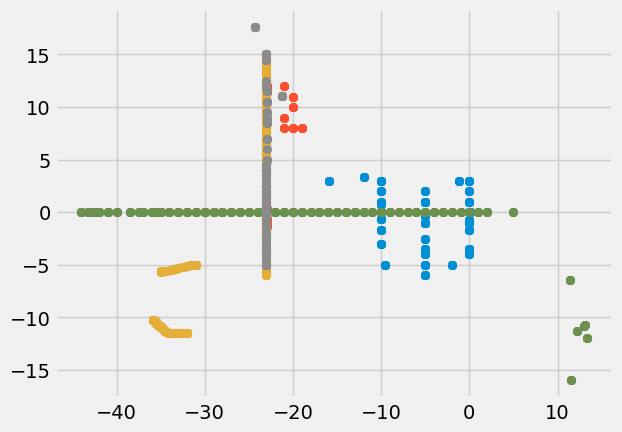

In [13]:
plt.scatter(data1.longitude,data1.latitude)
plt.scatter(data2.longitude,data2.latitude)
plt.scatter(data3.longitude,data3.latitude)
plt.scatter(data4.longitude,data4.latitude)
plt.scatter(data5.longitude,data5.latitude)

Variable: depth                Importance: 0.32
Variable: NO3                  Importance: 0.21
Variable: temperature          Importance: 0.18
Variable: DOY                  Importance: 0.08
Variable: latitude             Importance: 0.08
Variable: longitude            Importance: 0.07
Variable: salinity             Importance: 0.06


MLPRegressor(hidden_layer_sizes=(20, 20, 20), max_iter=1000, random_state=1)

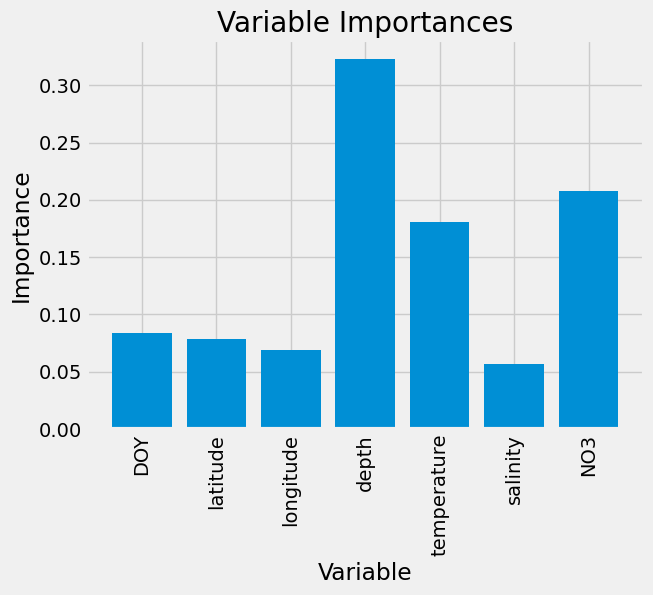

In [14]:
df['depth'] = pd.to_numeric(df.depth,errors='coerce')
df.dropna(subset=feature_list,axis=0,inplace=True)
df.dropna(subset=pft_list,axis=0,inplace=True)
from sklearn.model_selection import train_test_split
df.dropna(subset=feature_list,axis=0,inplace=True)
predictor = df[feature_list]
predictor_mean=np.mean(predictor,axis=0)
predictor_std=np.std(predictor,axis=0)
predictor = (predictor-predictor_mean)/predictor_std
y = df[pft_list].applymap(lambda x: 0 if x < 0 else x)
trainX, testX, trainY, testY = train_test_split(predictor,y,test_size=0.2)
RFreg = RandomForestRegressor(random_state=0)
RFreg.fit(trainX, trainY)
importances = list(RFreg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#=================
from sklearn.neural_network import MLPRegressor
NNreg = MLPRegressor(hidden_layer_sizes=(20,20,20),random_state=1, max_iter=1000)
NNreg.fit(trainX, trainY)

[But fuco]    0.023756
[Hex fuco]    0.046909
[Allo]        0.003088
[Fuco]        0.033498
[Perid]       0.008692
[Zea]         0.026002
[DV_Chl_a]    0.045470
[DV_Chl_b]    0.034600
dtype: float64


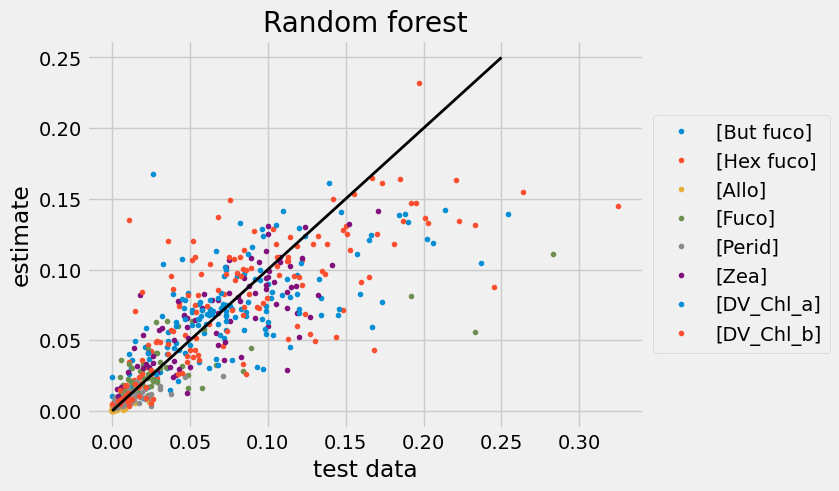

In [15]:
est = RFreg.predict(testX)
plt.plot(testY,est,'.',label=pft_list)
# i=7
# plt.plot(testY.iloc[:,i],est[:,i],'.',label=pft_list)
RMSE=np.sqrt(np.mean((testY-est)**2,axis=0))
print(RMSE)
plt.xlabel('test data')
plt.ylabel('estimate')
plt.title('Random forest')
plt.plot([0,0.25],[0,0.25],color='black',linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

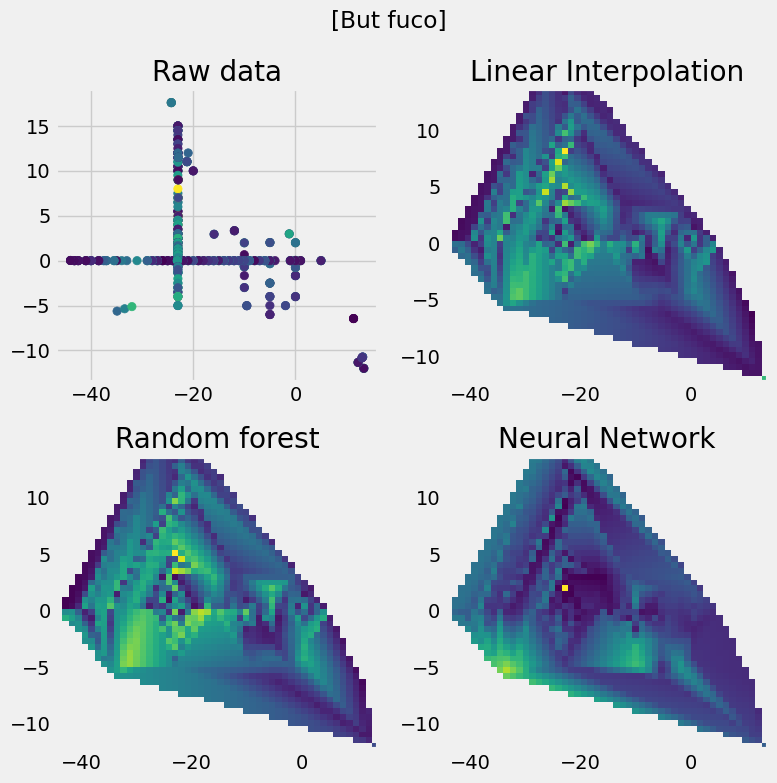

In [16]:
test = df
test['latitude'] = pd.to_numeric(test.latitude,errors='coerce')
test['Date'] = pd.to_datetime(test['Date'])
test['DOY'] = test.Date.dt.dayofyear
test['latitude'] = pd.to_numeric(test.latitude,errors='coerce')
test.loc[:,pft_list] = test[pft_list].applymap(lambda x: 0 if x < 0 else x)
#feature_list = ['longitude','longitude','latitude', 'temperature', 'salinity','Fluorometer']
predictor = test[feature_list]
dd = np.sum(np.array(predictor).T,axis=0)
ind=(np.isnan(dd)==False)
y_rf = pd.DataFrame(np.nan*np.ones((np.shape(predictor)[0],np.size(pft_list))))
y_nn= pd.DataFrame(np.nan*np.ones((np.shape(predictor)[0],np.size(pft_list))))
predictor = (predictor.loc[ind,:]-predictor_mean)/predictor_std
rf = RFreg.predict(predictor)
rf = np.where(rf<0,0,rf)
y_rf.loc[ind,:] = rf
nn = NNreg.predict(predictor)
nn = np.where(nn<0,0,nn)
y_nn.loc[ind,:] = nn

# Change for parameters
#pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]', '[MV_Chl_a]','[DV_Chl_a]', '[MV_Chl _b]', '[DV_Chl_b]']
i = 0
# plt.scatter(test.longitude,test.latitude,c=est[:,0])
# plt.ylim(300,0)
xline = np.linspace(np.nanmin(test.longitude), np.nanmax(test.longitude),50)
#yline = np.linspace(np.nanmin(test.latitude), np.nanmax(test.latitude),50)
yline = np.linspace(np.nanmin(test.latitude), np.nanmax(test.longitude),50)
xgrid, ygrid = np.meshgrid(xline, yline)
# Data interpolate
z_grid = griddata((test.longitude, test.latitude), test[pft_list[i]], (xgrid, ygrid), method='linear')
# RF interpolate
z_grid_rf = griddata((test.longitude, test.latitude), y_rf.loc[:,i], (xgrid, ygrid), method='linear')
# NN interpolate
z_grid_nn = griddata((test.longitude, test.latitude), y_nn.loc[:,i], (xgrid, ygrid), method='linear')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the data on each subplot
axs[0,0].scatter(test.longitude,test.latitude,c=test[pft_list[i]])
axs[0,0].set_title('Raw data')
axs[0,1].pcolormesh(xgrid, ygrid, z_grid)
axs[0,1].set_title('Linear Interpolation')
axs[1,0].pcolormesh(xgrid, ygrid, z_grid_rf)
axs[1,0].set_title('Random forest')
axs[1,1].pcolormesh(xgrid, ygrid, z_grid_nn)

axs[1,1].set_title('Neural Network')

# Add a title to the entire figure
fig.suptitle(pft_list[i])

# Adjust the layout of the subplots
plt.tight_layout()

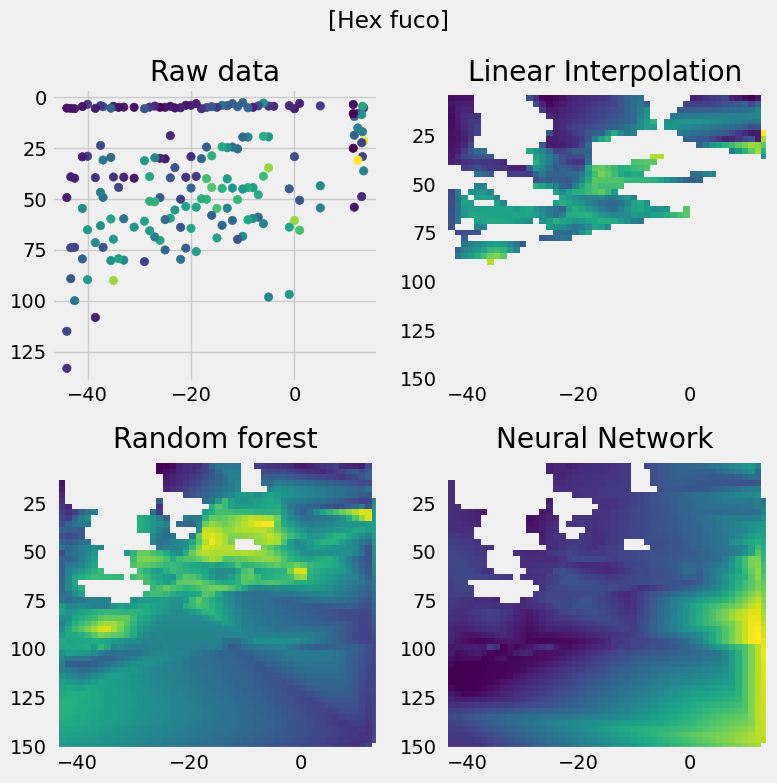

In [19]:
test = pd.read_excel('HPLC/M158_merged.xlsx')
test['Date'] = pd.to_datetime(test['Date'])
test['DOY'] = test.Date.dt.dayofyear
test['depth'] = pd.to_numeric(test.depth,errors='coerce')
test.loc[:,pft_list] = test[pft_list].applymap(lambda x: 0 if x < 0 else x)
#feature_list = ['longitude','Longitude','depth', 'temperature', 'salinity','Fluorometer']
predictor = test[feature_list]
dd = np.sum(np.array(predictor).T,axis=0)
ind=(np.isnan(dd)==False)
y_rf = pd.DataFrame(np.nan*np.ones((np.shape(predictor)[0],np.size(pft_list))))
y_nn= pd.DataFrame(np.nan*np.ones((np.shape(predictor)[0],np.size(pft_list))))
predictor = (predictor.loc[ind,:]-predictor_mean)/predictor_std
rf = RFreg.predict(predictor)
rf = np.where(rf<0,0,rf)
y_rf.loc[ind,:] = rf
nn = NNreg.predict(predictor)
nn = np.where(nn<0,0,nn)
y_nn.loc[ind,:] = nn

# Change for parameters
#pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]', '[MV_Chl_a]','[DV_Chl_a]', '[MV_Chl _b]', '[DV_Chl_b]']
i = 1
# plt.scatter(test.longitude,test.depth,c=est[:,0])
# plt.ylim(300,0)
xline = np.linspace(np.nanmin(test.longitude), np.nanmax(test.longitude),50)
#yline = np.linspace(np.nanmin(test.depth), np.nanmax(test.depth),50)
yline = np.linspace(np.nanmin(test.depth), 150,50)
xgrid, ygrid = np.meshgrid(xline, yline)
# Data interpolate
z_grid = griddata((test.longitude, test.depth), test[pft_list[i]], (xgrid, ygrid), method='linear')
# RF interpolate
z_grid_rf = griddata((test.longitude, test.depth), y_rf.loc[:,i], (xgrid, ygrid), method='linear')
# NN interpolate
z_grid_nn = griddata((test.longitude, test.depth), y_nn.loc[:,i], (xgrid, ygrid), method='linear')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the data on each subplot
axs[0,0].scatter(test.longitude,test.depth,c=test[pft_list[i]])
axs[0,0].set_title('Raw data')
axs[0,1].pcolormesh(xgrid, ygrid, z_grid)
axs[0,1].set_title('Linear Interpolation')
axs[1,0].pcolormesh(xgrid, ygrid, z_grid_rf)
axs[1,0].set_title('Random forest')
axs[1,1].pcolormesh(xgrid, ygrid, z_grid_nn)

axs[1,1].set_title('Neural Network')
axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()
# Add a title to the entire figure
fig.suptitle(pft_list[i])

# Adjust the layout of the subplots
plt.tight_layout()

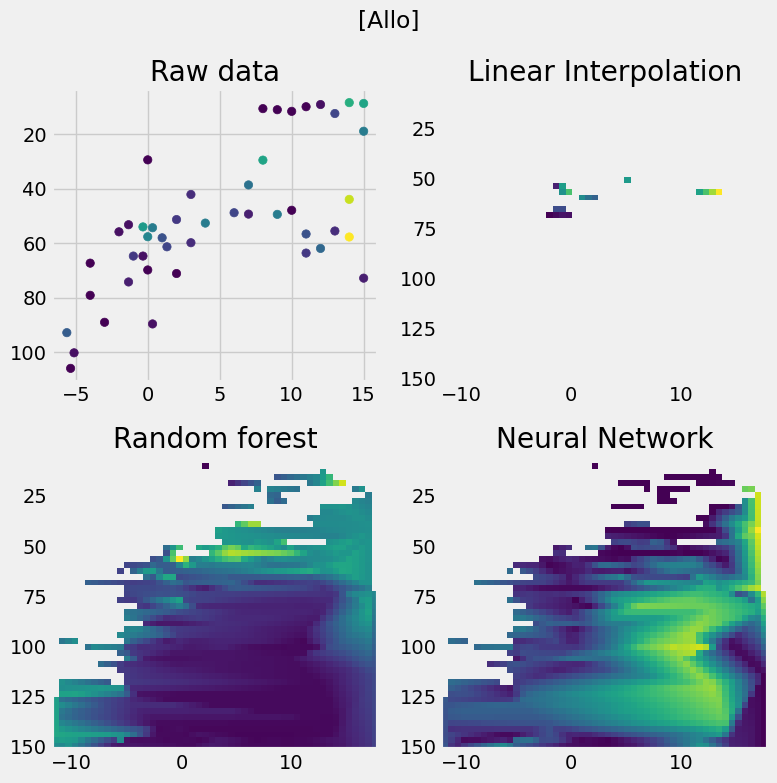

In [18]:
test = pd.read_excel('HPLC/M145_merged.xlsx')
test['Date'] = pd.to_datetime(test['Date'])
test['DOY'] = test.Date.dt.dayofyear
test['depth'] = pd.to_numeric(test.depth,errors='coerce')
#feature_list = ['latitude','Longitude','depth', 'temperature', 'salinity','Fluorometer']
# test.dropna(subset=feature_list,axis=0,inplace=True)
predictor = test[feature_list]
dd = np.sum(np.array(predictor).T,axis=0)
ind=(np.isnan(dd)==False)
y_rf = pd.DataFrame(np.nan*np.ones((np.shape(predictor)[0],np.size(pft_list))))
y_nn= pd.DataFrame(np.nan*np.ones((np.shape(predictor)[0],np.size(pft_list))))
predictor = (predictor.loc[ind,:]-predictor_mean)/predictor_std
rf = RFreg.predict(predictor)
rf = np.where(rf<0,0,rf)
y_rf.loc[ind,:] = rf
nn = NNreg.predict(predictor)
nn = np.where(nn<0,0,nn)
y_nn.loc[ind,:] = nn

# Change for parameters
#pft_list = ['[But fuco]', '[Hex fuco]', '[Allo]','[Fuco]', '[Perid]', '[Zea]', '[MV_Chl_a]','[DV_Chl_a]', '[MV_Chl _b]', '[DV_Chl_b]']
i = 2
# plt.scatter(test.latitude,test.depth,c=est[:,0])
# plt.ylim(300,0)
xline = np.linspace(np.nanmin(test.latitude), np.nanmax(test.latitude),50)
#yline = np.linspace(np.nanmin(test.depth), np.nanmax(test.depth),50)
yline = np.linspace(np.nanmin(test.depth), 150,50)
xgrid, ygrid = np.meshgrid(xline, yline)
# Data interpolate
z_grid = griddata((test.latitude, test.depth), test[pft_list[i]], (xgrid, ygrid), method='linear')
# RF interpolate
z_grid_rf = griddata((test.latitude, test.depth), y_rf.loc[:,i], (xgrid, ygrid), method='linear')
# NN interpolate
z_grid_nn = griddata((test.latitude, test.depth), y_nn.loc[:,i], (xgrid, ygrid), method='linear')

# Create a figure with three subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the data on each subplot
axs[0,0].scatter(test.latitude,test.depth,c=test[pft_list[i]])
axs[0,0].set_title('Raw data')
axs[0,1].pcolormesh(xgrid, ygrid, z_grid)
axs[0,1].set_title('Linear Interpolation')
axs[1,0].pcolormesh(xgrid, ygrid, z_grid_rf)
axs[1,0].set_title('Random forest')
axs[1,1].pcolormesh(xgrid, ygrid, z_grid_nn)

axs[1,1].set_title('Neural Network')
axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()
# Add a title to the entire figure
fig.suptitle(pft_list[i])

# Adjust the layout of the subplots
plt.tight_layout()